In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Conectar a la base de datos SQLITE
conn = sqlite3.connect('sanoyfresco.db')

In [3]:
# Cargar una tabla completa en un DataFrame
df = pd.read_sql_query("SELECT * FROM tickets", conn)

# Mostrar los primeros registros del DataFrame
df.head()

,id_pedido,id_cliente,fecha,hora,id_departamento,id_seccion,id_producto,nombre_producto,precio_unitario,cantidad,precio_total
0,1,112108,2023-02-02 00:00:00,10,4,83,49683,Pepino Kirby,0.99,4,3.96
1,1,112108,2023-02-02 00:00:00,10,4,24,13176,Bolsa de Bananas Orgánicas,2.45,4,9.80
2,1,112108,2023-02-02 00:00:00,10,4,24,47209,Aguacate Hass Orgánico,1.79,2,3.58
3,2,202279,2023-02-03 00:00:00,9,4,83,28985,Col Rizada Orgánica de Michigan,2.55,2,5.10
4,2,202279,2023-02-03 00:00:00,9,4,83,17794,Zanahorias,0.95,5,4.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975718 entries, 0 to 4975717
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id_pedido        int64  
 1   id_cliente       int64  
 2   fecha            object 
 3   hora             int64  
 4   id_departamento  int64  
 5   id_seccion       int64  
 6   id_producto      int64  
 7   nombre_producto  object 
 8   precio_unitario  float64
 9   cantidad         int64  
 10  precio_total     float64
dtypes: float64(2), int64(7), object(2)
memory usage: 417.6+ MB


In [ ]:
#Transformamos dato fecha de objetct a fecha
df['fecha'] = pd.to_datetime(df['fecha'])

In [ ]:
# Comprobar si hay valores nulos en el DataFrame
df.isnull().sum()


,0
id_pedido,0
id_cliente,0
fecha,0
hora,0
id_departamento,0
id_seccion,0
id_producto,0
nombre_producto,0
precio_unitario,0
cantidad,0


In [ ]:
#Estadísticas descriptivas
df.describe()

,id_pedido,id_cliente,fecha,hora,id_departamento,id_seccion,id_producto,precio_unitario,cantidad,precio_total
count,4.975718e+06,4.975718e+06,4975718,4.975718e+06,4.975718e+06,4.975718e+06,4.975718e+06,4.975718e+06,4.975718e+06,4.975718e+06
mean,1.710496e+06,1.028372e+05,2023-05-15 06:11:44.462109952,1.341417e+01,4.992144e+00,5.809954e+01,2.862542e+04,1.596929e+00,5.015206e+00,8.009874e+00
min,1.000000e+00,1.000000e+00,2023-01-01 00:00:00,0.000000e+00,4.000000e+00,1.600000e+01,4.605000e+03,6.200000e-01,1.000000e+00,6.200000e-01
25%,8.552620e+05,5.111900e+04,2023-02-19 00:00:00,1.000000e+01,4.000000e+00,2.400000e+01,2.113700e+04,9.900000e-01,4.000000e+00,4.350000e+00
50%,1.710466e+06,1.024700e+05,2023-04-27 00:00:00,1.300000e+01,4.000000e+00,2.400000e+01,2.620900e+04,1.490000e+00,5.000000e+00,7.140000e+00
75%,2.565128e+06,1.543180e+05,2023-07-29 00:00:00,1.600000e+01,4.000000e+00,8.300000e+01,4.195000e+04,2.250000e+00,6.000000e+00,1.068000e+01
max,3.421083e+06,2.062090e+05,2023-12-31 00:00:00,2.300000e+01,2.000000e+01,1.230000e+02,4.968300e+04,2.850000e+00,1.300000e+01,3.705000e+01
std,9.873063e+05,5.950903e+04,NaN,4.259586e+00,3.382969e+00,3.909031e+01,1.292617e+04,6.695222e-01,1.983126e+00,4.803981e+00


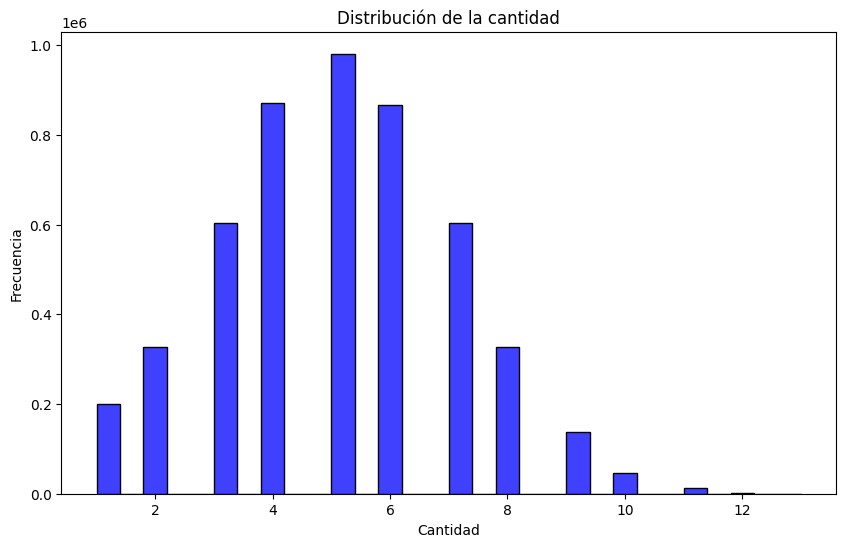

In [ ]:
# Histograma de la cantidad
plt.figure(figsize=(10,6))
sns.histplot(df['cantidad'], kde=False, bins=30, color='blue')
plt.title('Distribución de la cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

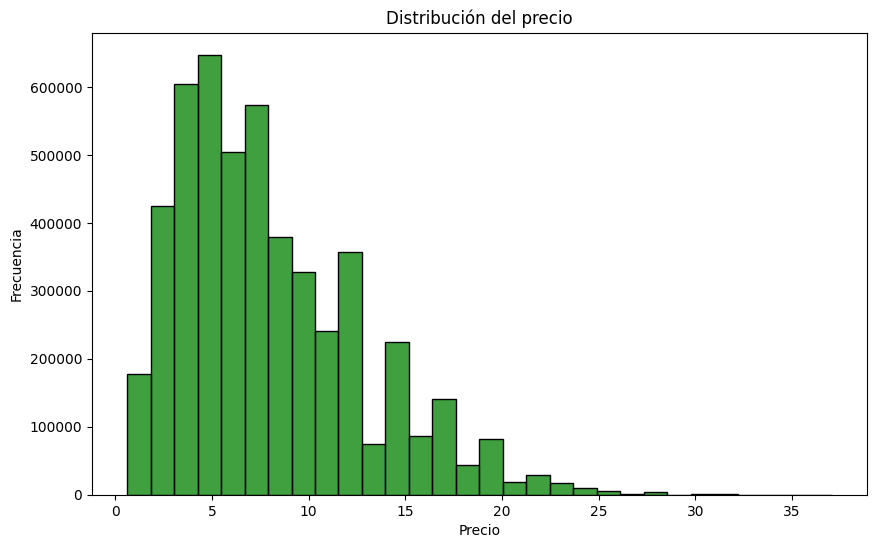

In [ ]:
# Histograma del precio
plt.figure(figsize=(10,6))
sns.histplot(df['precio_total'], kde=False, bins=30, color='green')
plt.title('Distribución del precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

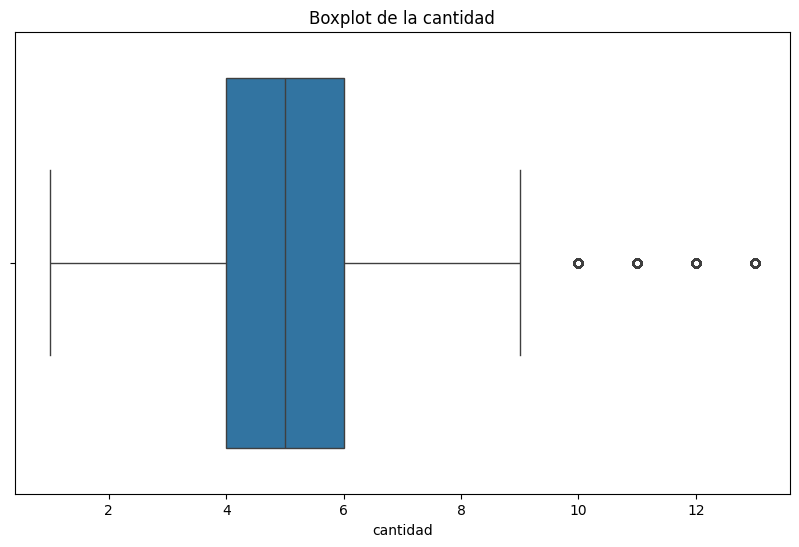

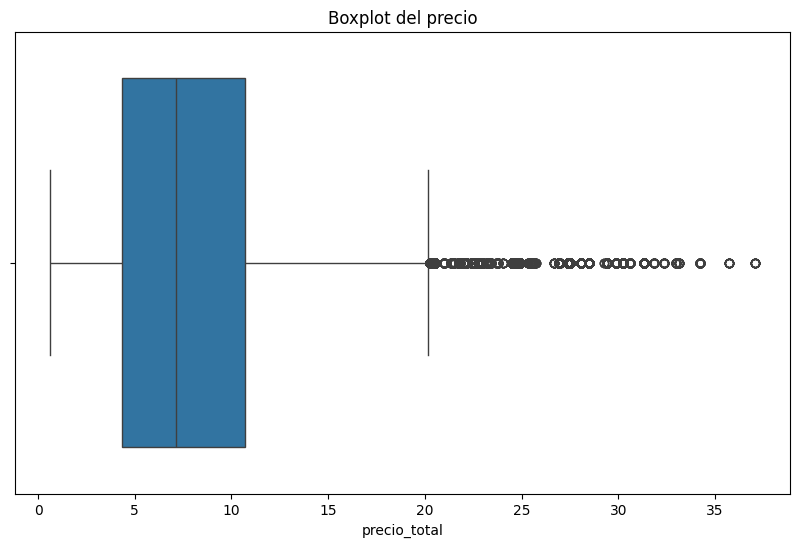

In [ ]:
# Boxplot de la cantidad
plt.figure(figsize=(10,6))
sns.boxplot(x=df['cantidad'])
plt.title('Boxplot de la cantidad')
plt.show()

# Boxplot del precio
plt.figure(figsize=(10,6))
sns.boxplot(x=df['precio_total'])
plt.title('Boxplot del precio')
plt.show()


<ipython-input-17-ed993dbca617>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cantidad'], shade=True, color='blue')


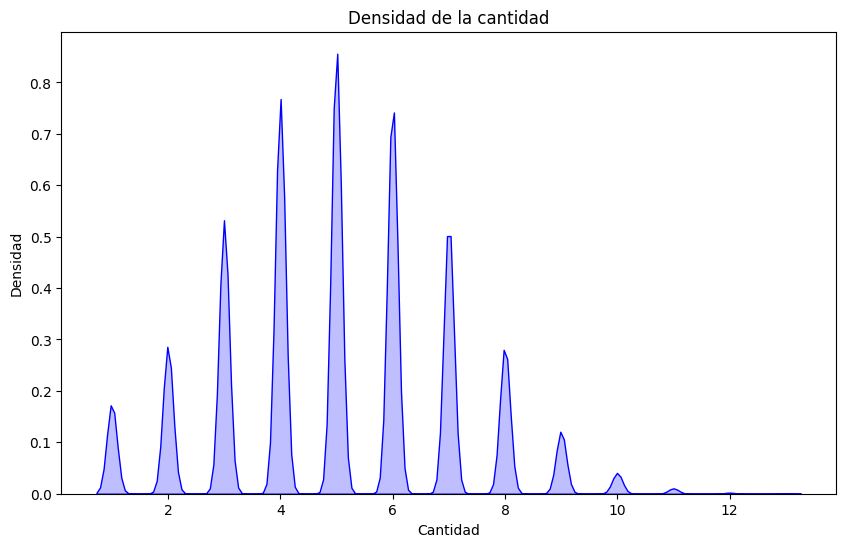

<ipython-input-17-ed993dbca617>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['precio_total'], shade=True, color='green')


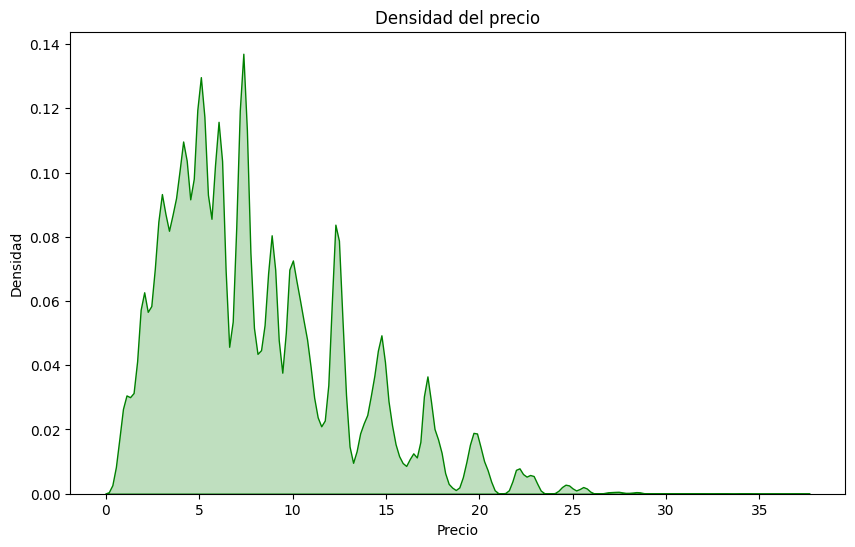

In [ ]:
# KDE de la cantidad
plt.figure(figsize=(10,6))
sns.kdeplot(df['cantidad'], shade=True, color='blue')
plt.title('Densidad de la cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Densidad')
plt.show()

# KDE del precio
plt.figure(figsize=(10,6))
sns.kdeplot(df['precio_total'], shade=True, color='green')
plt.title('Densidad del precio')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.show()


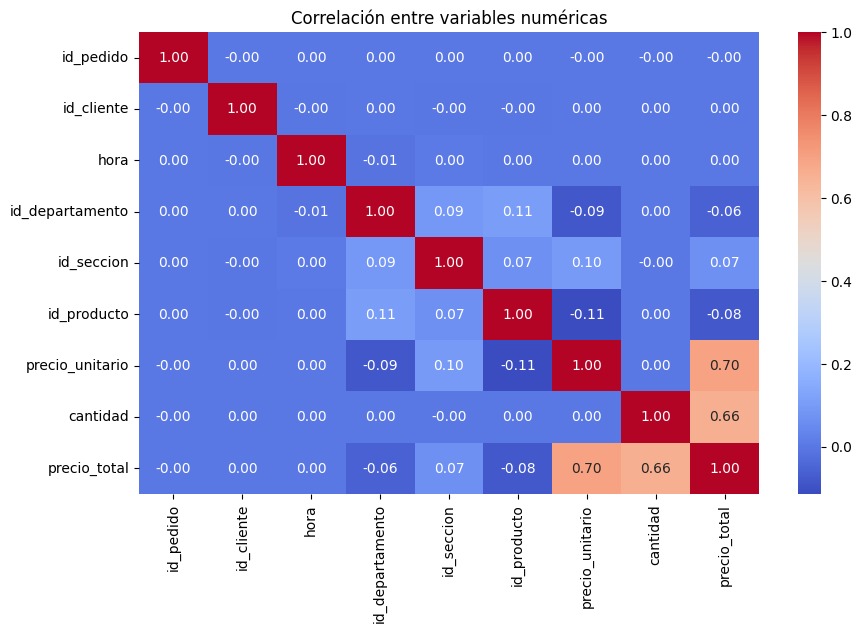

In [ ]:
# Seleccionar solo columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Calcular la correlación entre las variables numéricas
corr = numerical_df.corr()

# Mostrar el mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas')
plt.show()


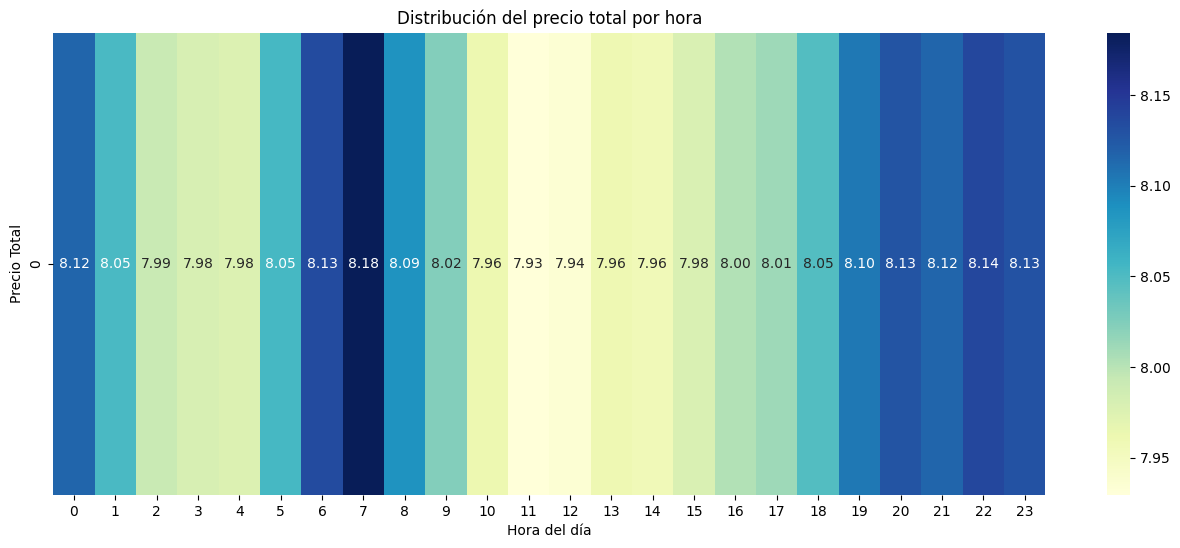

In [ ]:
# Agrupamos por hora y calculamos la media del precio total
hora_media_precio = df.groupby('hora')['precio_total'].mean()

# Crear el mapa de calor solo con el precio
plt.figure(figsize=(16,6))
sns.heatmap(hora_media_precio.values.reshape(1, -1), annot=True, cmap='YlGnBu', fmt='.2f', cbar=True, xticklabels=hora_media_precio.index)
plt.title('Distribución del precio total por hora')
plt.xlabel('Hora del día')
plt.ylabel('Precio Total')
plt.show()



In [ ]:
#Analizamos medianas, medias y variables
columnas_a_analizar = ['precio_total']

In [ ]:
for columna in columnas_a_analizar:
    plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<ipython-input-33-d1745f533622>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[columna], shade=True, color='gray', alpha=0.5)


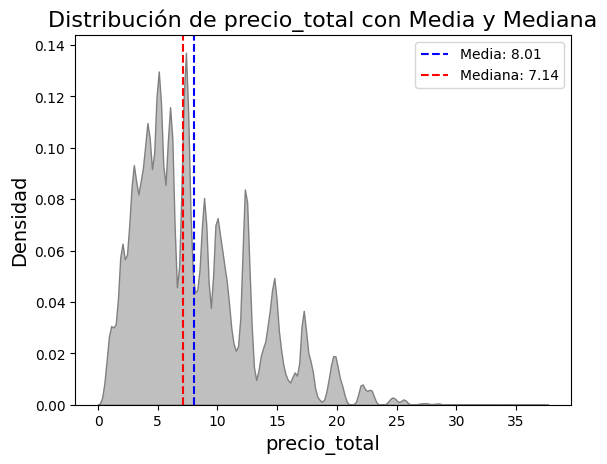

In [ ]:
# Crear el kde plot (Kernel Density Estimation) para suavizar la distribución
sns.kdeplot(df[columna], shade=True, color='gray', alpha=0.5)

# Calcular la media y mediana
mean_value = df[columna].mean()
median_value = df[columna].median()

 # Agregar las líneas de la media y la mediana
plt.axvline(mean_value, color='blue', linestyle='--', label=f'Media: {mean_value:.2f}')
plt.axvline(median_value, color='red', linestyle='--', label=f'Mediana: {median_value:.2f}')

# Configurar título y etiquetas
plt.title(f'Distribución de {columna} con Media y Mediana', fontsize=16)
plt.xlabel(columna, fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression

In [ ]:
df['precio_total'] = df['precio_total'] * df['cantidad']

In [ ]:
# 1. Cálculo de estadísticas descriptivas
media_precio = df['precio_total'].mean()
mediana_precio = df['precio_total'].median()
moda_precio = df['precio_total'].mode()[0]
varianza_precio = df['precio_total'].var()
desviacion_precio = df['precio_total'].std()

In [ ]:
# Imprimir estadísticas descriptivas
print(f"Media: {media_precio:.2f}")
print(f"Mediana: {mediana_precio:.2f}")
print(f"Moda: {moda_precio:.2f}")
print(f"Varianza: {varianza_precio:.2f}")
print(f"Desviación estándar: {desviacion_precio:.2f}")

Media: 46.45
Mediana: 36.25
Moda: 61.25
Varianza: 1703.01
Desviación estándar: 41.27


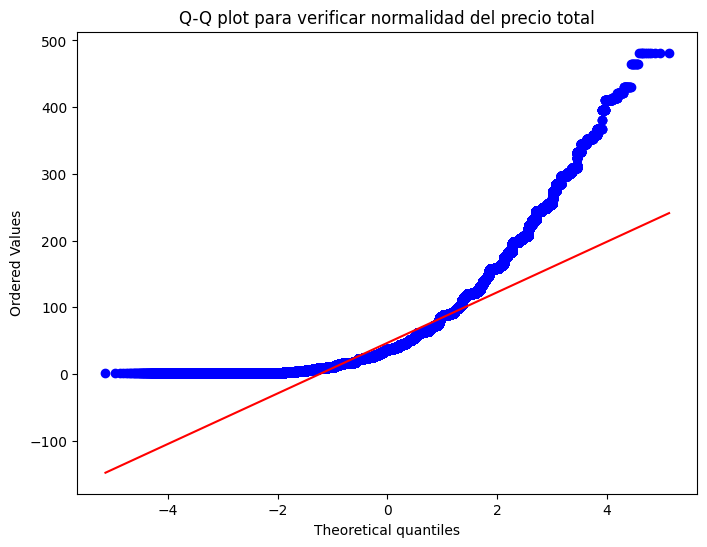

In [ ]:
# 2. Verificar la normalidad de la distribución
# Realizamos un gráfico de Q-Q para verificar la normalidad
plt.figure(figsize=(8,6))
stats.probplot(df['precio_total'], dist="norm", plot=plt)
plt.title("Q-Q plot para verificar normalidad del precio total")
plt.show()

In [4]:
df_corr = df[['precio_total', 'cantidad']].dropna()


In [7]:
# Barajamos los datos aleatoriamente pero SIN eliminar registros
# Muestra de 1000 registros
df_sample = df_corr.sample(1000, random_state=42)

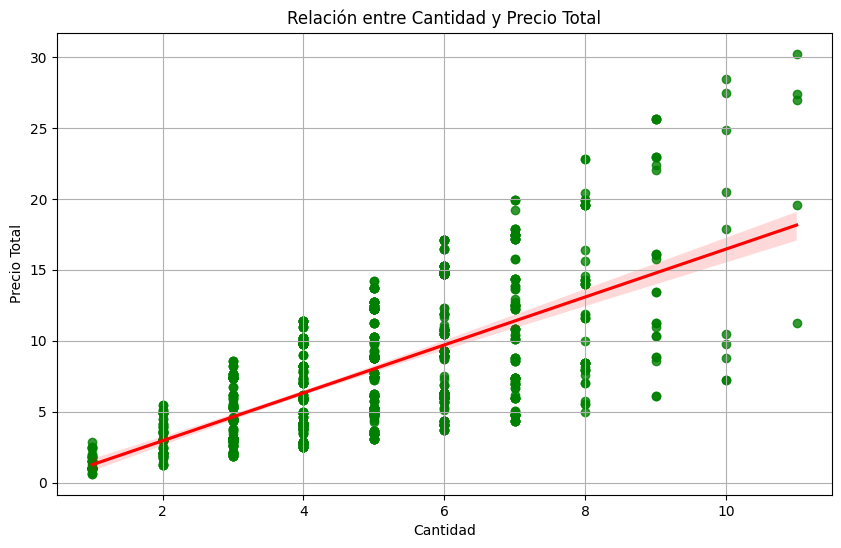

In [8]:
# Gráfica de dispersión con regresión lineal
plt.figure(figsize=(10,6))
sns.regplot(data=df_sample,
            x='cantidad',
            y='precio_total',
            scatter_kws={'color': 'green'},
            line_kws={'color': 'red'})
plt.title('Relación entre Cantidad y Precio Total')
plt.xlabel('Cantidad')
plt.ylabel('Precio Total')
plt.grid(True)
plt.show()

In [9]:
correlacion = df_corr['cantidad'].corr(df_corr['precio_total'])
print(f"Coeficiente de correlación: {correlacion:.4f}")


Coeficiente de correlación: 0.6596


In [11]:
from sklearn.linear_model import LinearRegression

# Definimos las variables
X = df[['cantidad']]  # Variable independiente
y = df['precio_total']  # Variable dependiente

# Creamos y entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X, y)


LinearRegression()

In [12]:
r2 = modelo.score(X, y)
print(f"Coeficiente de determinación (R²): {r2:.4f}")


Coeficiente de determinación (R²): 0.4350


📈 Resumen del paso a paso
Definir X e y (X = df[['cantidad']], y = df['precio_total']).

Crear modelo: modelo = LinearRegression().

Entrenar modelo: modelo.fit(X, y).

Calcular
𝑅
2
R
2
 : modelo.score(X, y).

Interpretar el resultado: 43,5% de la variabilidad explicada.

In [13]:
from sklearn.model_selection import train_test_split

# Definir X e y
X = df[['cantidad']]
y = df['precio_total']

# Dividir en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Crear modelo
modelo = LinearRegression()

# Entrenar solo con datos de entrenamiento
modelo.fit(X_train, y_train)


LinearRegression()

In [15]:
r2_train = modelo.score(X_train, y_train)
print(f"Coeficiente de determinación (R²) en Train: {r2_train:.4f}")


Coeficiente de determinación (R²) en Train: 0.4350


In [16]:
#en test, para ver si generaliza:
r2_test = modelo.score(X_test, y_test)
print(f"Coeficiente de determinación (R²) en Test: {r2_test:.4f}")


Coeficiente de determinación (R²) en Test: 0.4350


In [ ]:
#Para visualizar en n gráfico de burbujas

# Agrupar por 'id_seccion' y calcular la suma total de 'precio_total' por cada sección
secciones_sum = df.groupby('id_seccion')['precio_total'].sum().reset_index()

# Crear el gráfico de burbujas
plt.figure(figsize=(14,8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

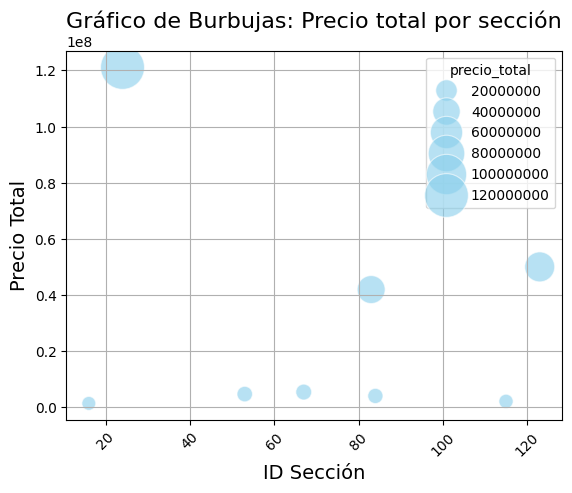

In [ ]:
# Usamos la suma de 'precio_total' como tamaño de la burbuja
sns.scatterplot(data=secciones_sum, x='id_seccion', y='precio_total',
                size='precio_total', sizes=(100, 1000), color='skyblue', alpha=0.6)

# Títulos y etiquetas
plt.title('Gráfico de Burbujas: Precio total por sección', fontsize=16)
plt.xlabel('ID Sección', fontsize=14)
plt.ylabel('Precio Total', fontsize=14)
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejorar la visibilidad
plt.grid(True)

plt.show()

In [ ]:
#Ingresos según día de la semana
# Extraemos el día de la semana (0=domingo, 6=sábado)
df['dia_semana'] = df['fecha'].dt.dayofweek

In [ ]:
# Agrupamos por 'dia_semana' y calculamos la suma de 'precio_total'
ingresos_por_dia = df.groupby('dia_semana')['precio_total'].sum().reset_index()

In [ ]:
# Reemplazamos los valores de 'dia_semana' por los nombres de los días
ingresos_por_dia['dia_semana'] = ingresos_por_dia['dia_semana'].map({
    0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'})

In [ ]:
# Ordenamos por los ingresos
ingresos_por_dia = ingresos_por_dia.sort_values(by='precio_total', ascending=False)

# Mostramos el resultado
print(ingresos_por_dia)

  dia_semana  precio_total
6    Domingo    7120078.10
0      Lunes    6607127.59
5     Sábado    5498649.01
1     Martes    5395216.36
4    Viernes    5284461.98
2  Miércoles    5018715.45
3     Jueves    4930626.83


<ipython-input-12-d207cd7a79b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dia_semana', y='precio_total', data=ingresos_por_dia, palette='viridis')


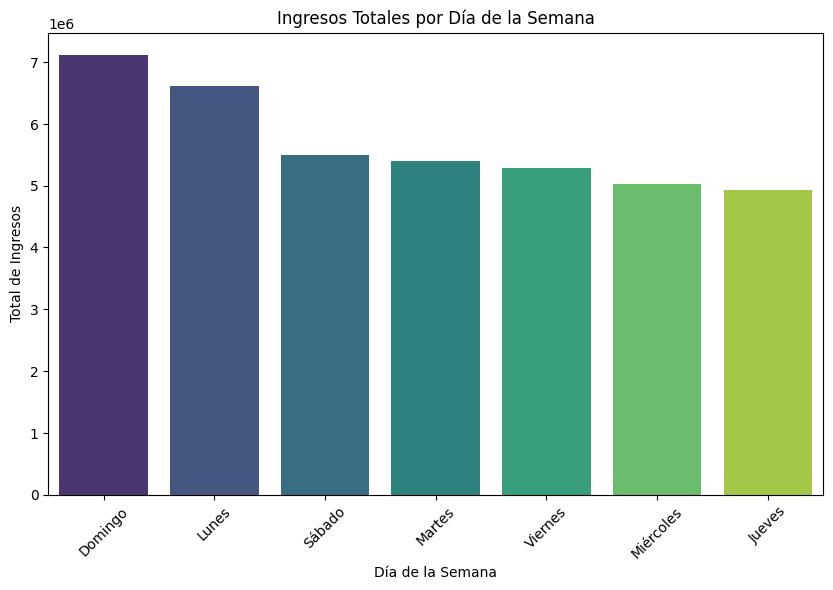

In [ ]:
# Visualización de los ingresos por día de la semana
plt.figure(figsize=(10,6))
sns.barplot(x='dia_semana', y='precio_total', data=ingresos_por_dia, palette='viridis')

plt.title('Ingresos Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=45)
plt.show()
